<a href="https://colab.research.google.com/github/alfonsoayalapaloma/ml-2024/blob/main/ml_03_classifiers_svc_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://pandas.pydata.org/static/img/pandas.svg" width="250">


## <center> SVC Classifiers

# Solución de un problema de clasificación en Machine Learning



1.   Análisis del problema. Eleccion de un modelo.
2.   Extracción del dataset. Limpieza
1.   EDA. Analisis de la dataset
1.   Feature engineering [ determinar variables independientes(X) y dependiente(y)]
2.   Partir el dataset en train y test
2.   Crear el modelo y Entrenarlo
1.   Hacer predicciones
1.   Calificar el modelo
2.   Visualizar el resultado del modelo
1.   Conclusiones


# Problema de clasificación binaria en el dataset Titanic.

1. Análisis del problema


Usted es un ingeniero de Machine Learning y se le pide desarrollar un modelo que determine la supervivencia de un pasajero en el Titanic dada su edad  (Age) y el valor de su ticket (Fare).
Este es un problema de clasificacion y de aprendizaje supervisado, pues se tienen ejemplos marcados con labels supervicencia (survival).

Se puede utilizar un clasificador como SVC. Se usará la accuracy para calificar el modelo.

2. Extraccion del dataset. Limpieza

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np

# Load the Titanic dataset
titanic = sns.load_dataset('titanic')

df=titanic.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [23]:
df = titanic.dropna(subset=['age', 'fare'])

In [24]:
df["survived"].value_counts()

,count
survived,
0,424
1,290


In [25]:
290/(424+290)

0.4061624649859944

In [38]:
df.sample(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
105,0,3,male,28.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
671,0,1,male,31.0,1,0,52.0000,S,First,man,True,B,Southampton,no,False
380,1,1,female,42.0,0,0,227.5250,C,First,woman,False,NaN,Cherbourg,yes,True


3. EDA. Análisis del dataset

In [26]:
target_col = 'survived'
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
numeric_cols.remove(target_col)
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(numeric_cols)
print(categorical_cols)


['pclass', 'age', 'sibsp', 'parch', 'fare']
['sex', 'embarked', 'who', 'embark_town', 'alive']


In [49]:
#label encode sex
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['embarked']=le.fit_transform(df['embarked'])



<ipython-input-49-d13fc20e29e6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sex'] = le.fit_transform(df['sex'])
<ipython-input-49-d13fc20e29e6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['embarked']=le.fit_transform(df['embarked'])


In [50]:
features=['pclass','age','fare','sex','embarked']
df[features].sample(3)

,pclass,age,fare,sex,embarked
338,3,45.0,8.0500,1,2
862,1,48.0,25.9292,0,2
636,3,32.0,7.9250,1,2


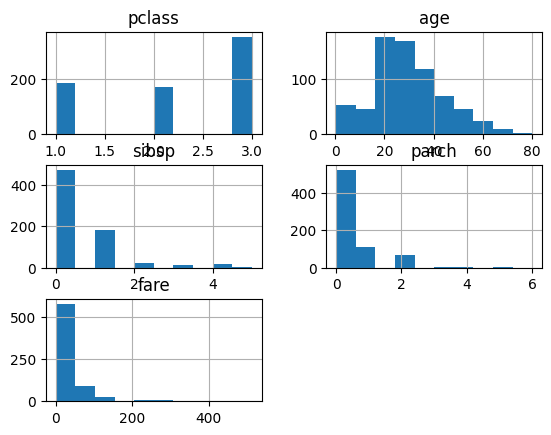

In [27]:
df[numeric_cols].hist();

Text(0, 0.5, 'Value')

<Figure size 1500x1800 with 0 Axes>

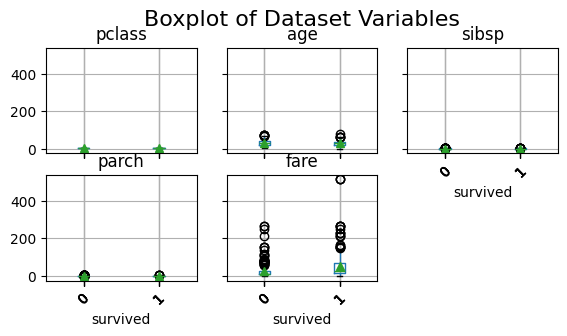

In [28]:
import pandas as pd
import matplotlib.pyplot as plt


plt.figure(figsize=(15, 18))
df.boxplot(column=numeric_cols,
             by=target_col,
             layout=(3, 3),
             rot=45,
             showmeans=True)

# Set title and labels
plt.suptitle('Boxplot of Dataset Variables', fontsize=16)
plt.xlabel(target_col)
plt.ylabel('Value')

 Responda:
*   Cuantos sobrevivieron?
*   Tasa de supervivencia (Porcentual)
*   Habrá alguno todavia vivo?
*   De que lugar se embarcó la mayoría?
*   Sobrevivieron mas mujeres y niños? (que hombres)
*   Podria Jack haber sobrevivido? Cual sería su probabilidad de supervivencia?

In [29]:
df["alive"].value_counts()
#alive 290

#mayoria embarcados....
df["embark_town"].value_counts()

#cantidad mujeres
print("mujeres:")
print(df[(df["sex"]=="female") & (df["survived"]==1 )]["sex"].count())
#cantidad hombres
print("hombres:")
df[(df["sex"]=="male") & (df["survived"]==1 )]["sex"].count()

#Probabilidad de supervivencia de 3a clase:
print("Cantidad tercera clase supervivientes ")
sobreviven=df[(df["class"]=="Third") & (df["survived"]==1 )]["class"].count()
print(sobreviven)
total=df[(df["class"]=="Third") ]["class"].count()
print("probabilidad de supervivencia")
print(sobreviven/total)

#print("Cantidad tercera clase:")
#total=df[(df["class"]=="Third") ]["class"].count()
#print("probabilidad de supervivencia")



mujeres:
197
hombres:
Cantidad tercera clase supervivientes 
85
probabilidad de supervivencia
0.23943661971830985


4. Feature engineering [ determinar variables independientes(X) y dependiente(y)]

In [51]:
target_names = df[target_col].unique()
#features=['age', 'fare']

# Prepare the features and target
X = df[features]
y = df[target_col]

5. Partir el dataset en train y test

In [52]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (571, 5)
X_test (143, 5)
y_train (571,)
y_test (143,)


6. Crear y Entrenar (Ajustar) el modelo.

In [53]:
# Initialize
model = SVC(kernel='linear', random_state=42)

# train the Support Vector Classifier
model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

7. Hacer predicciones

In [54]:
# Make predictions on the test set
y_pred = model.predict(X_test)


8. Calificar el modelo

In [55]:
from sklearn.metrics import classification_report

#Convert to string
target_names = target_names.astype(str)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report
report = classification_report(y_test, y_pred, target_names=target_names)
print("Classification Report:\n", report)

Accuracy: 0.73
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.79      0.78        87
           1       0.67      0.64      0.65        56

    accuracy                           0.73       143
   macro avg       0.72      0.72      0.72       143
weighted avg       0.73      0.73      0.73       143



Recuerde que:


*   Precision se usa cuando nos importa minimizar Falsos Positivos.
*   Recall se usa cuando nos importa minimizar Falsos Negativos.



In [ ]:
svc=SVC(random_state=42)
#set up gridsearchCV
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['rbf', 'linear']}
grid_search=GridSearchCV(estimator=svc, param_grid=param_grid, scoring='accuracy',cv=5, verbose=2, n_jobs=1)
grid_search.fit(X_train,y_train)
best_params=grid_search.best_params_
print(best_params)
best_score=grid_search.best_score_
print(best_score)




Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.2s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.2s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.1s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.

### Comparación con un DummyClassifier


In [35]:
### Comparacion con un DummyClassifier
from sklearn.dummy import DummyClassifier
dummy= DummyClassifier(strategy='most_frequent')
dummy.fit(X_train, y_train)
y_pred_dummy = dummy.predict(X_test)
print(dummy.score(X_test, y_test))

dummy_accuracy = accuracy_score(y_test, y_pred_dummy)
print(f"Dummy Classifier Accuracy: {dummy_accuracy:.2f}")


0.6083916083916084
Dummy Classifier Accuracy: 0.61


9. Visualizar el resultado

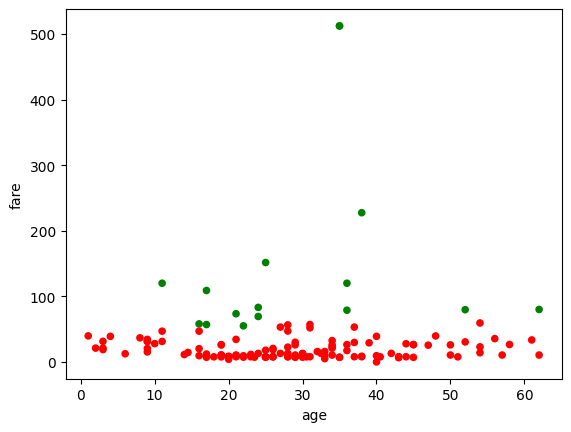

In [36]:
combined_df =X_test.copy()
combined_df['y_pred'] = y_pred
combined_df['y_test'] = y_test

colors = {0:"red",1:"green"}
combined_df['colors'] = combined_df['y_pred'].map(colors)
combined_df.plot.scatter(x=features[0], y=features[1], color=combined_df['colors']);

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


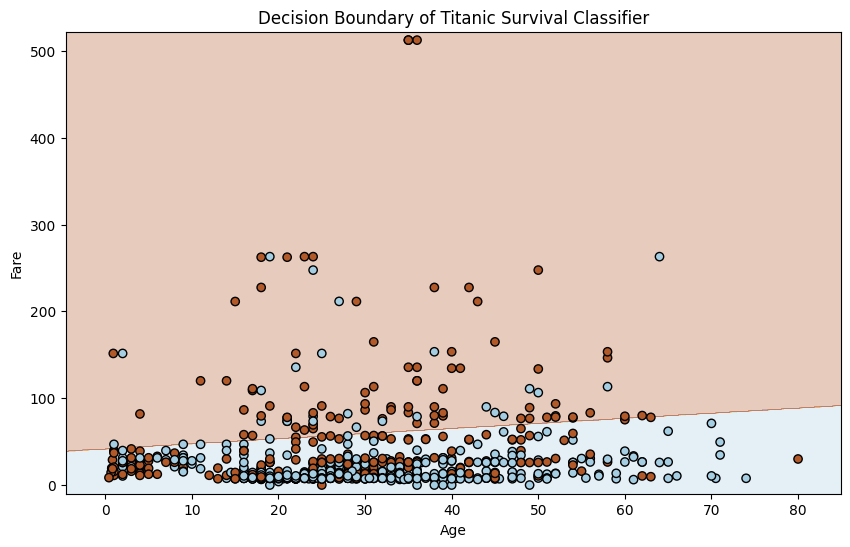

In [37]:
# Plot decision boundaries
h = 0.5  # step size in the mesh
x_min, x_max = X['age'].min() - 5, X['age'].max() + 5
y_min, y_max = X['fare'].min() - 10, X['fare'].max() + 10
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict on the mesh grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotting
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
plt.scatter(X['age'], X['fare'], c=y, edgecolor='k', cmap=plt.cm.Paired)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Decision Boundary of Titanic Survival Classifier')
plt.show()


10. Elaborar conclusiones

El modelo tiene una accuracy media por lo que se NO acepta como clasificador del dataset.

# EJERCICIO
Seleccione por lo menos cinco features adicionales buscando aumentar el accuracy del modelo. Compare contra un DummyClassifier


1. Análisis del problema. Elección de un modelo.

2. Extracción del dataset. Limpieza.

3. EDA Análisis del dataset

4. Feature engineering.  [ determinar variables independientes(X) y dependiente(y)]

5. partir el dataset en train y test

6. Crear el modelo y entrenarlo.

7. Hacer predicciones

8. Calificar el modelo

9. Visualizar el resultado del modelo

10. Conclusiones

# EJERCICIO

Realice el mismo ejercicio con el dataset de IRIS

